In [ ]:
import librosa
import numpy as np

audio_path = "/content/LJ050-0274.wav"
signal, sr = librosa.load(audio_path, sr=16000, mono=True)

signal = signal / np.max(np.abs(signal))
duration = len(signal) / sr

print("Sampling Rate:", sr)
print("Duration (sec):", duration)


Sampling Rate: 16000
Duration (sec): 4.5001875


Sampling Rate: 22050
Total Duration: 4.500181405895692 seconds

Total Letters: 56

Letter Classification:

Letter: 's'  →  Fricative


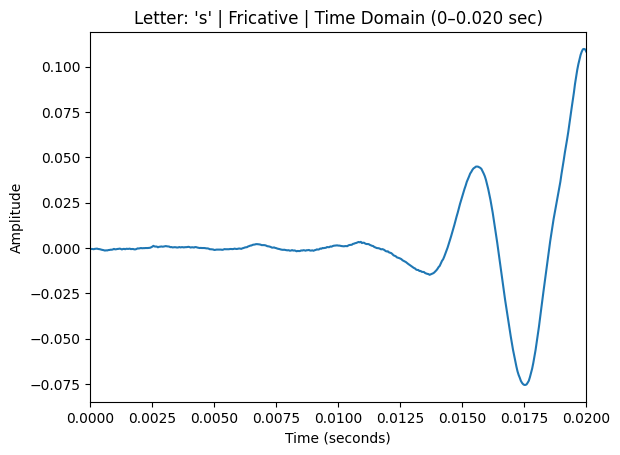

Letter: 'h'  →  Fricative


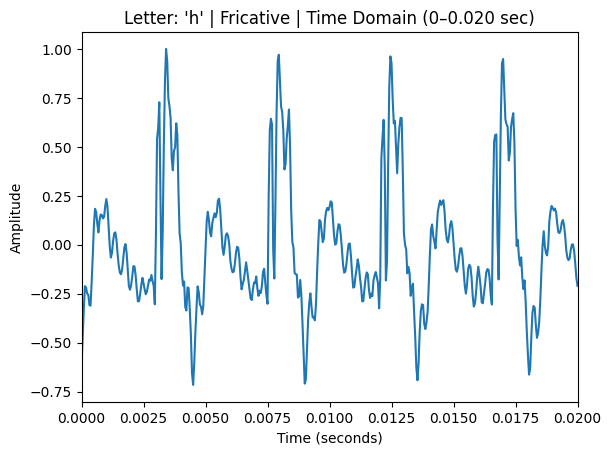

Letter: 'e'  →  Vowel


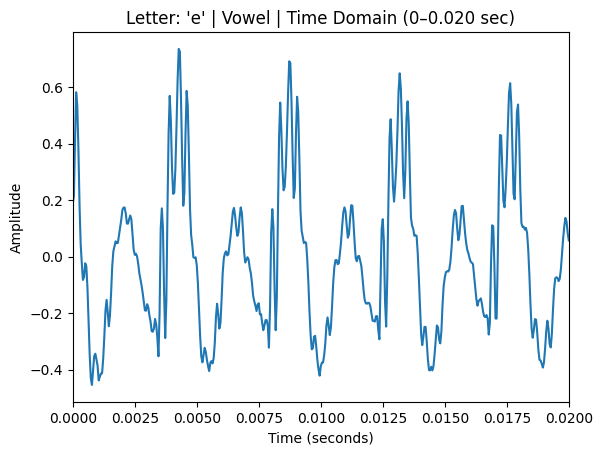

Letter: 'j'  →  Affricate


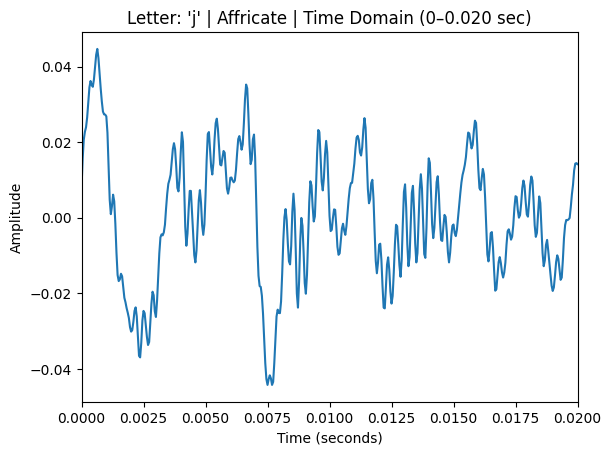

Letter: 'u'  →  Vowel


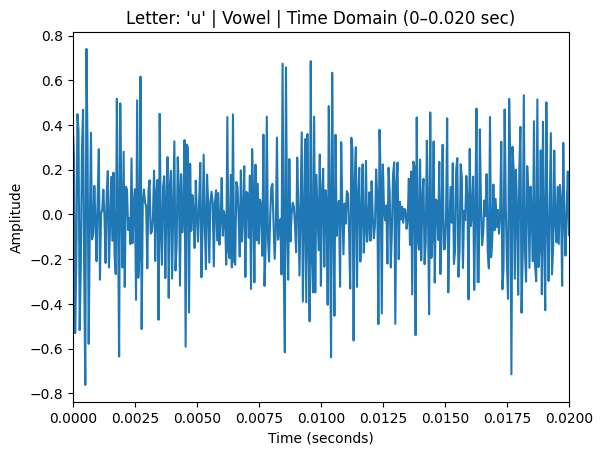

Letter: 'd'  →  Voiced Plosive


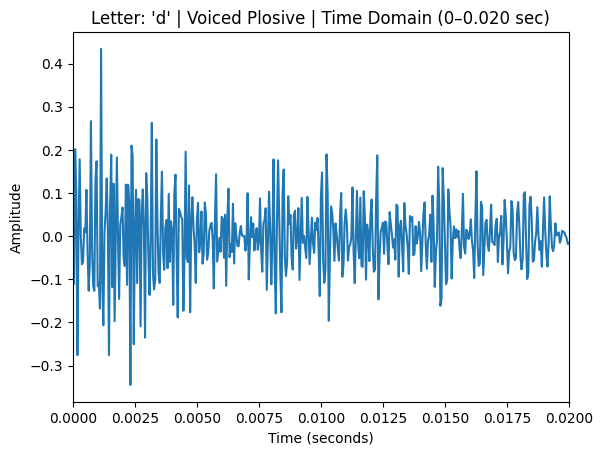

Letter: 'g'  →  Voiced Plosive


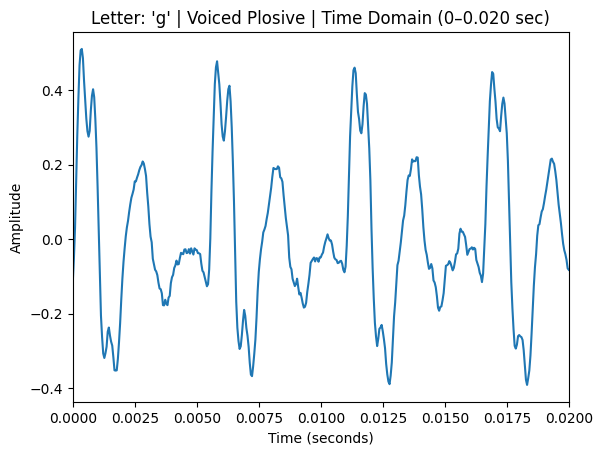

Letter: 'e'  →  Vowel


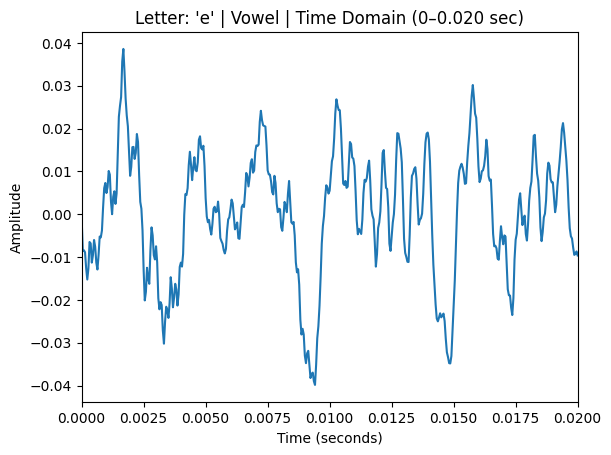

Letter: 'd'  →  Voiced Plosive


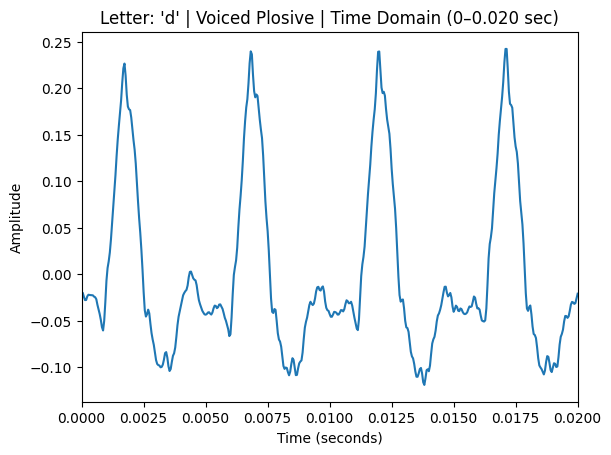

Letter: 't'  →  Voiceless Plosive


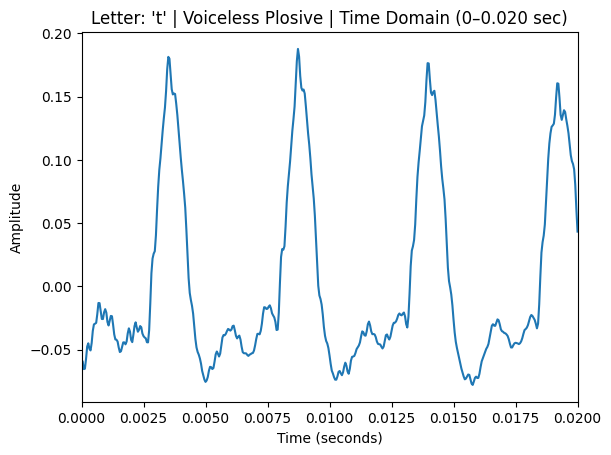

Letter: 'h'  →  Fricative


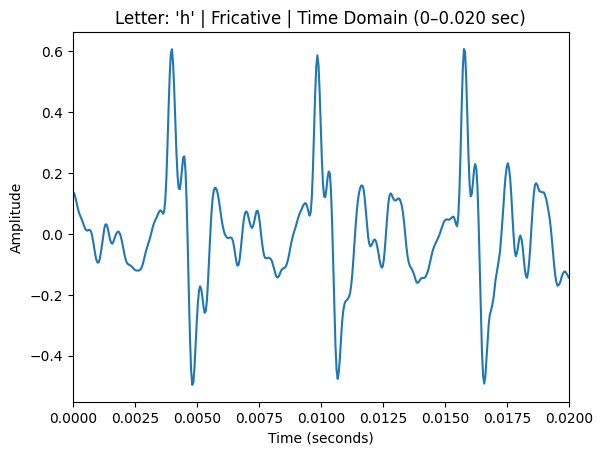

Letter: 'e'  →  Vowel


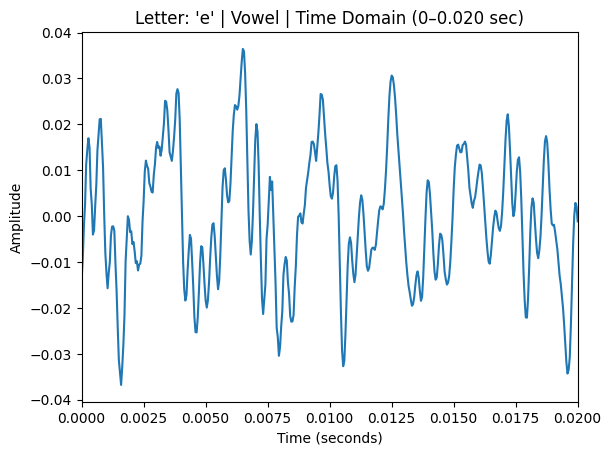

Letter: 'b'  →  Voiced Plosive


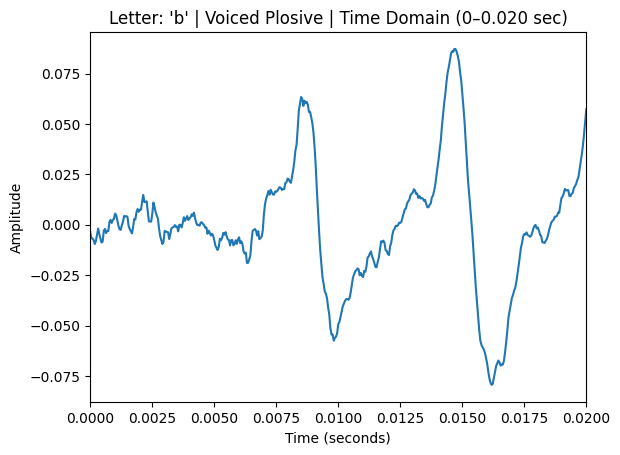

Letter: 'l'  →  Approximant (Semi-vowel)


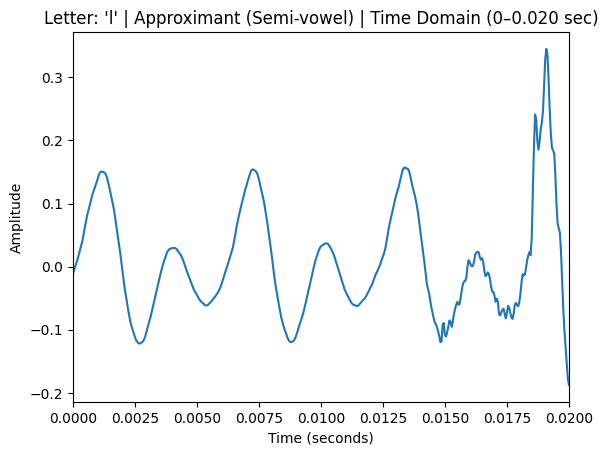

Letter: 'u'  →  Vowel


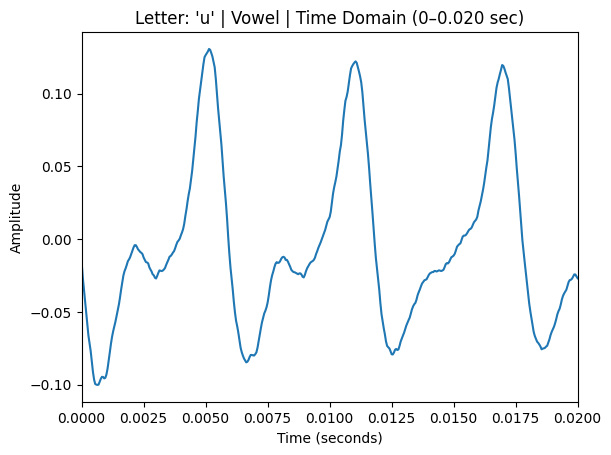

Letter: 'e'  →  Vowel


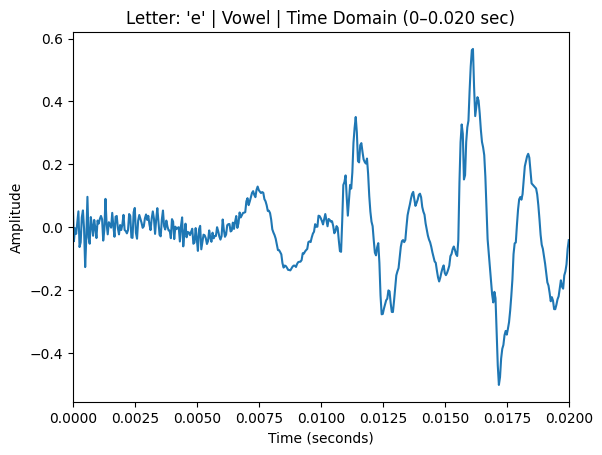

Letter: 'p'  →  Voiceless Plosive


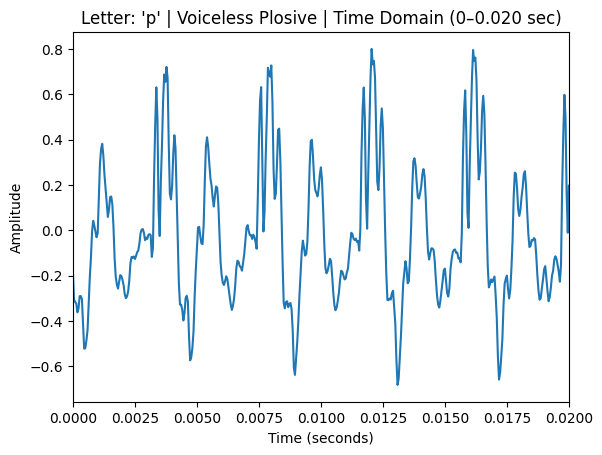

Letter: 'e'  →  Vowel


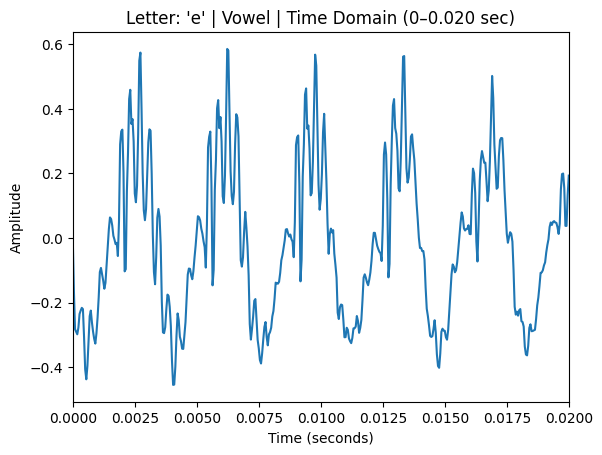

Letter: 'n'  →  Nasal


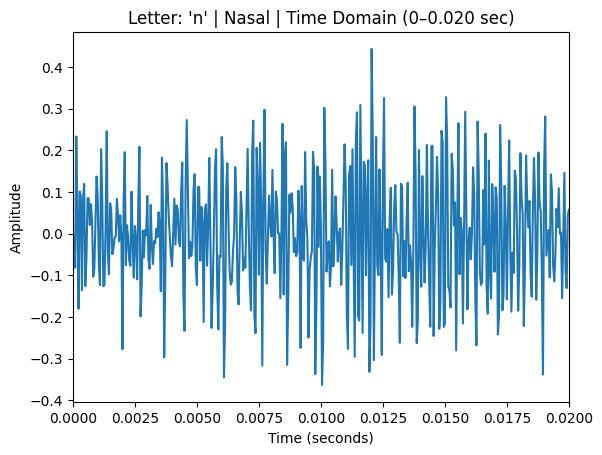

Letter: 'p'  →  Voiceless Plosive


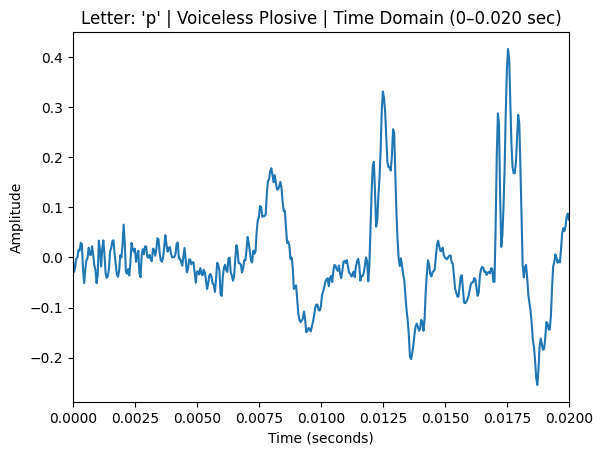

Letter: 'u'  →  Vowel


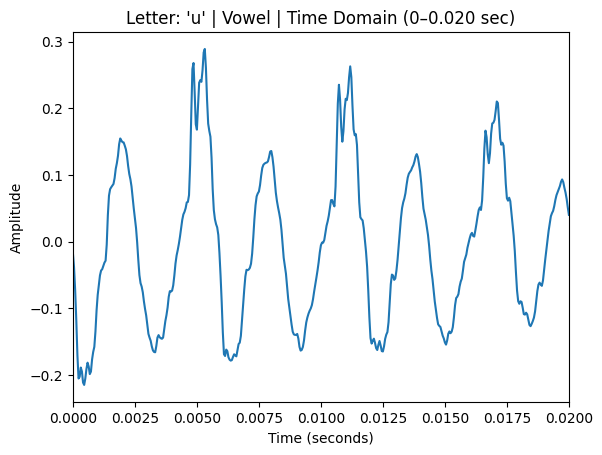

Letter: 't'  →  Voiceless Plosive


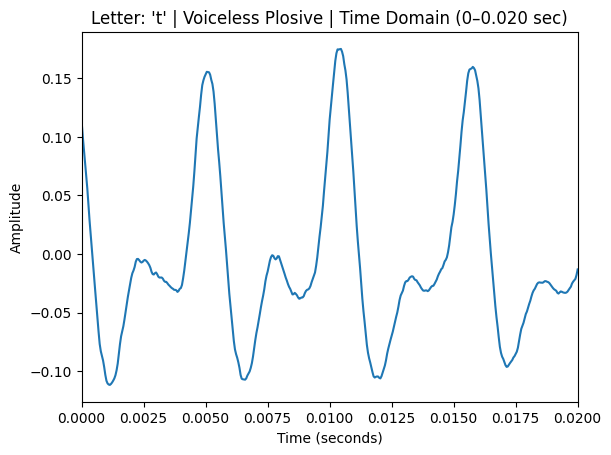

Letter: 'i'  →  Vowel


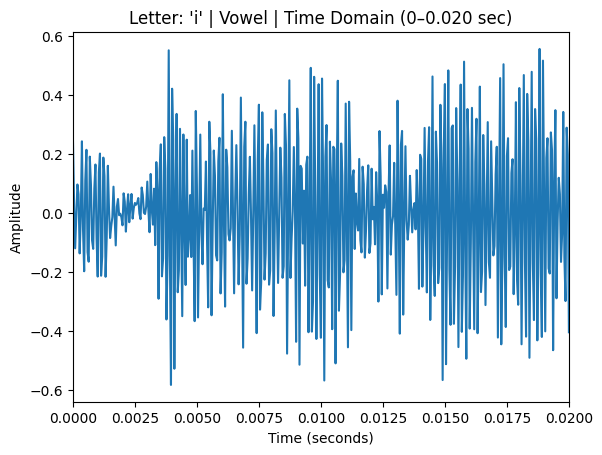

Letter: 't'  →  Voiceless Plosive


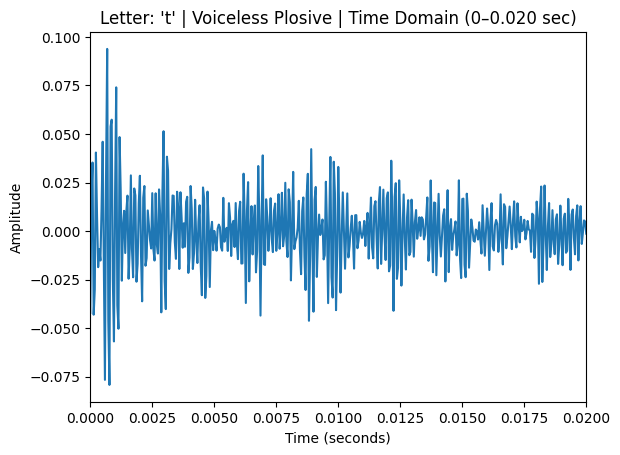

Letter: 'o'  →  Vowel


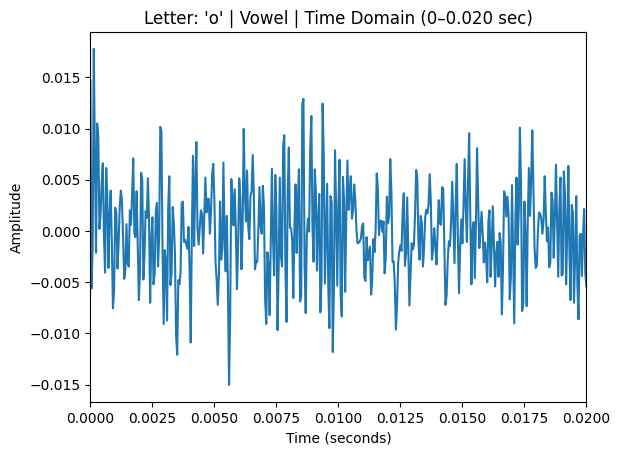

Letter: 'n'  →  Nasal


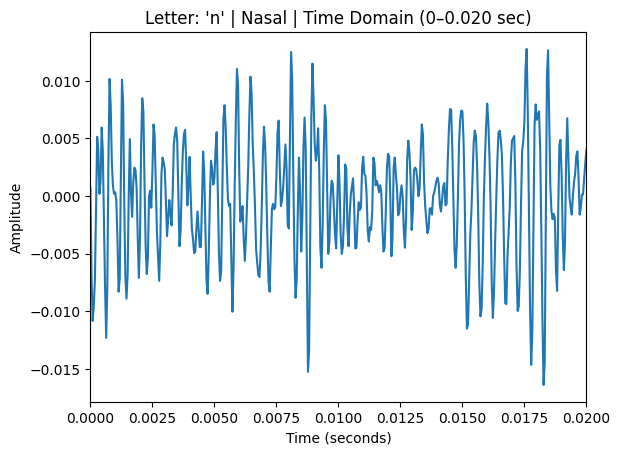

Letter: 't'  →  Voiceless Plosive


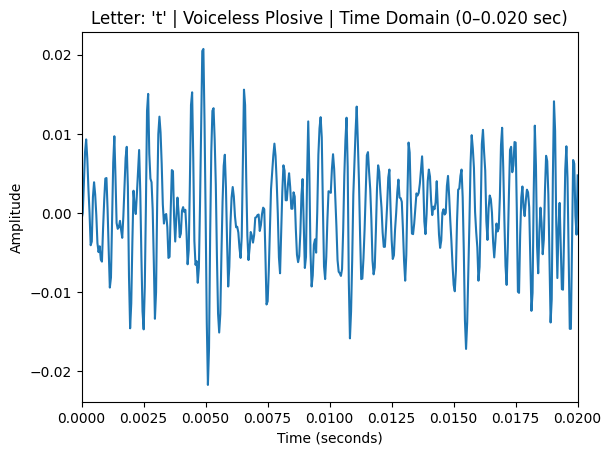

Letter: 'h'  →  Fricative


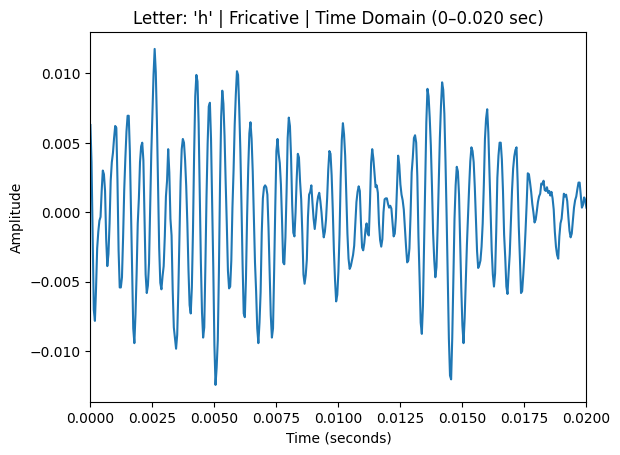

Letter: 'e'  →  Vowel


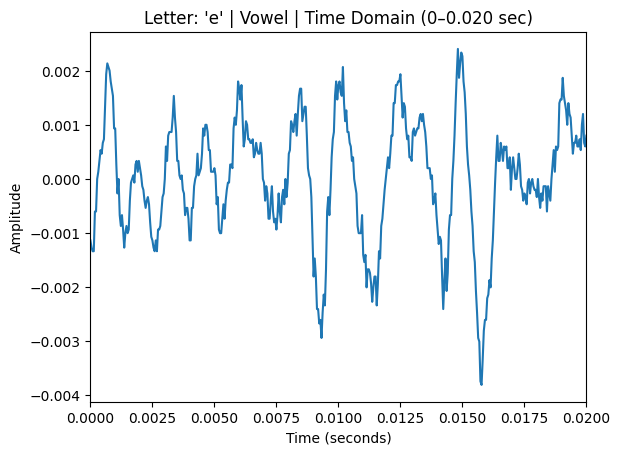

Letter: 't'  →  Voiceless Plosive


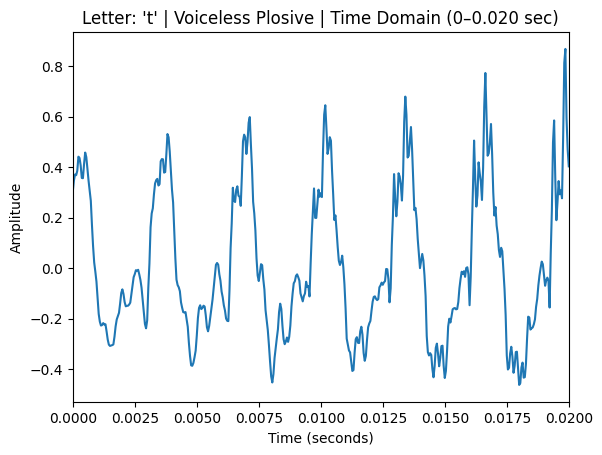

Letter: 'a'  →  Vowel


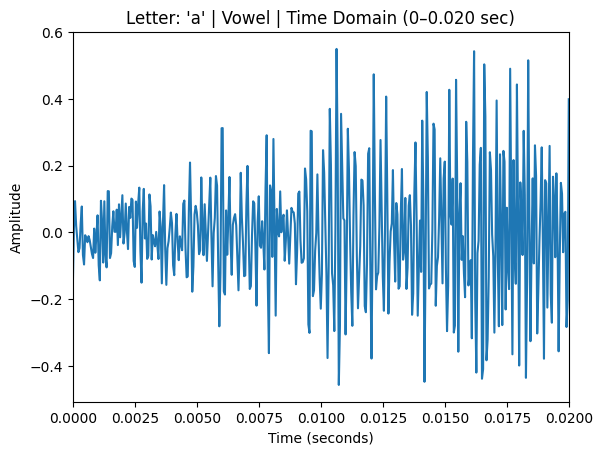

Letter: 'b'  →  Voiced Plosive


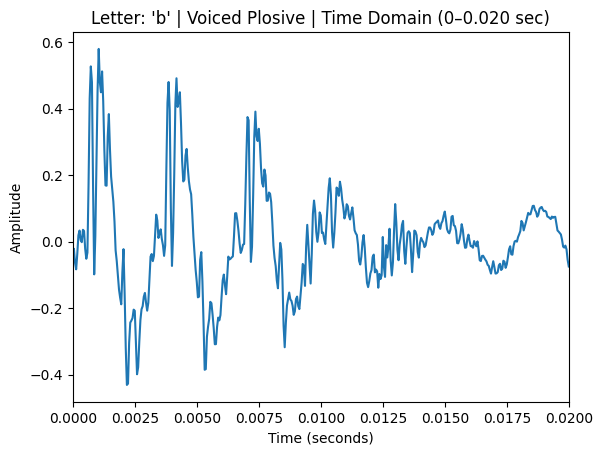

Letter: 'l'  →  Approximant (Semi-vowel)


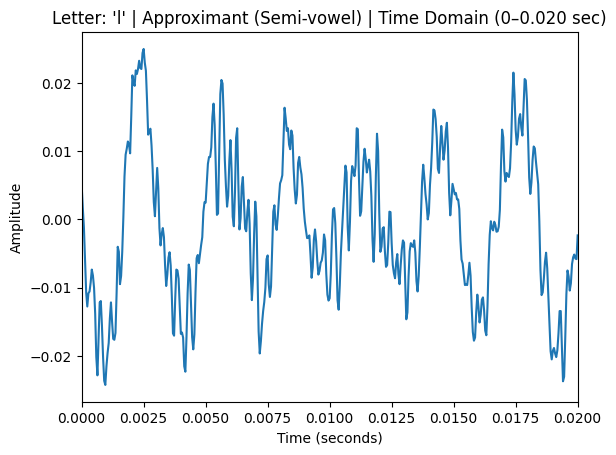

Letter: 'e'  →  Vowel


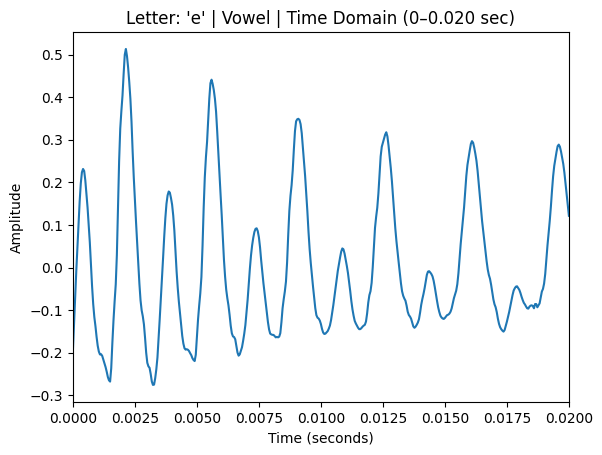

Letter: 'a'  →  Vowel


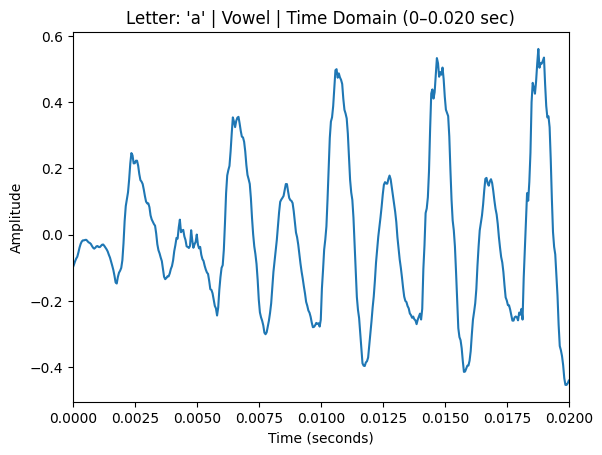

Letter: 'n'  →  Nasal


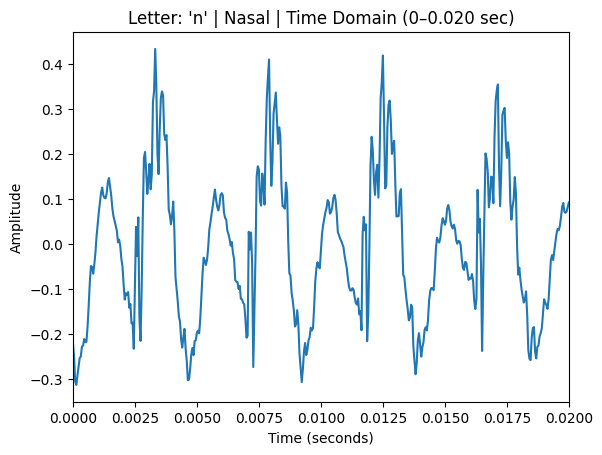

Letter: 'd'  →  Voiced Plosive


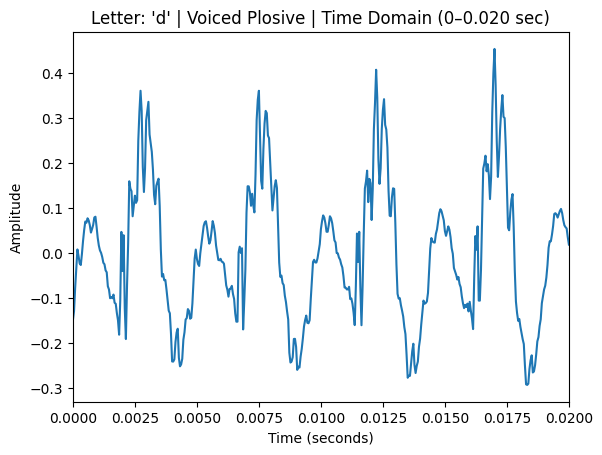

Letter: 'q'  →  Other


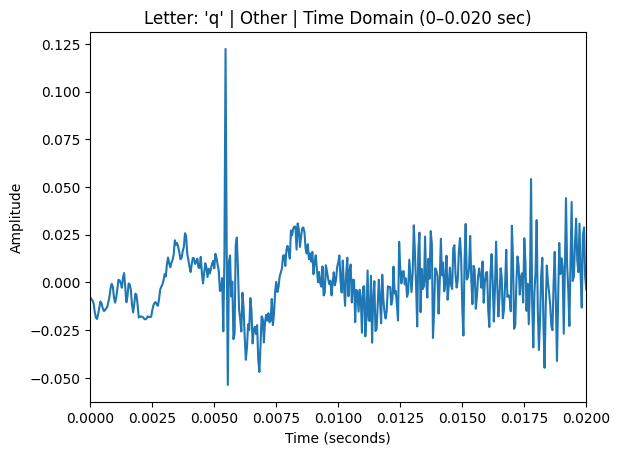

Letter: 'u'  →  Vowel


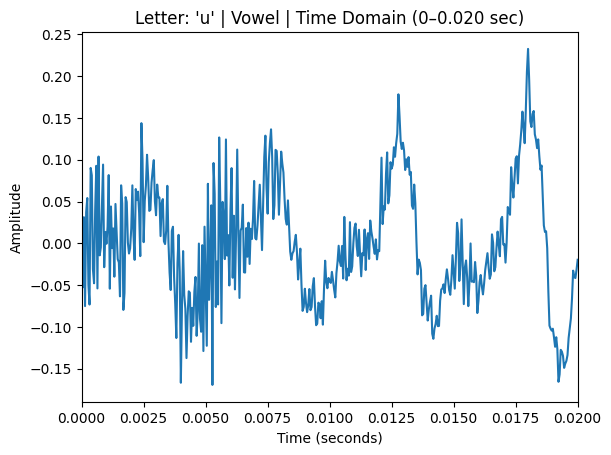

Letter: 'i'  →  Vowel


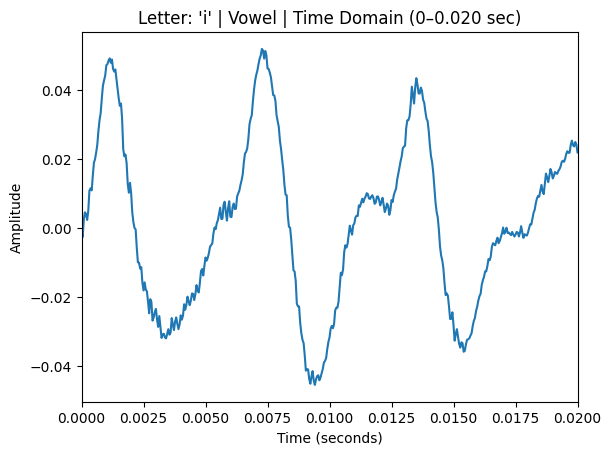

Letter: 'e'  →  Vowel


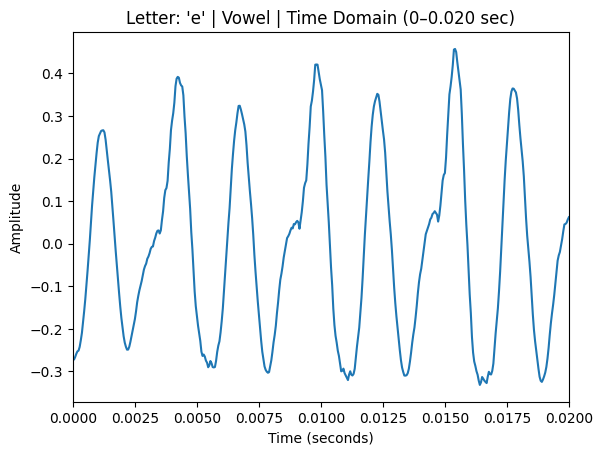

Letter: 't'  →  Voiceless Plosive


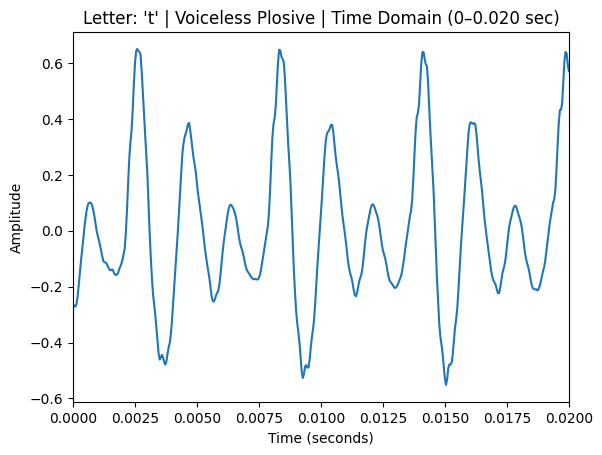

Letter: 'l'  →  Approximant (Semi-vowel)


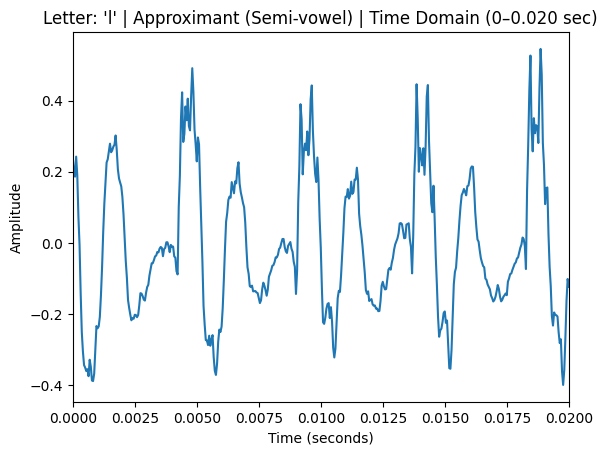

Letter: 'y'  →  Approximant (Semi-vowel)


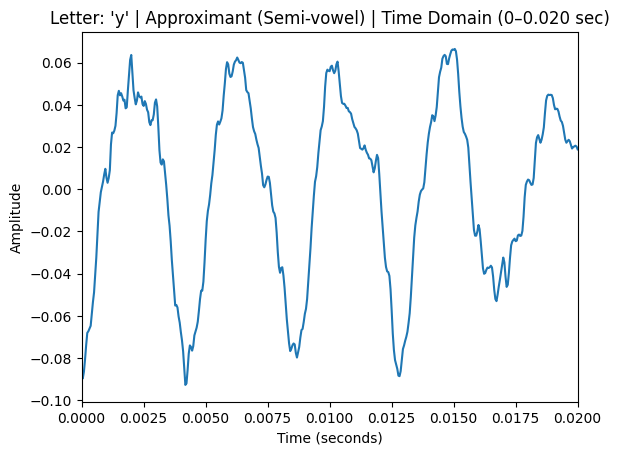

Letter: 'w'  →  Approximant (Semi-vowel)


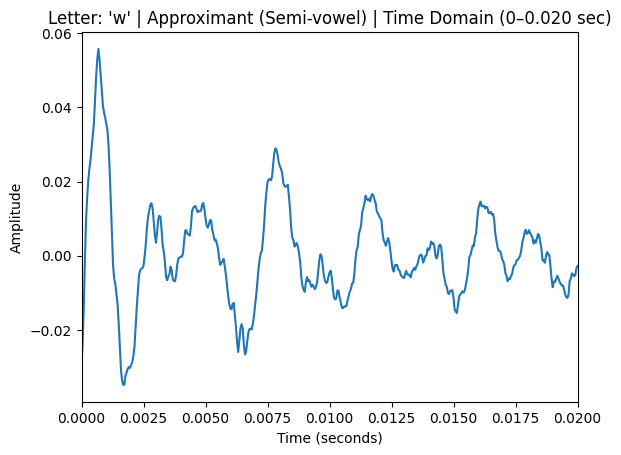

Letter: 'h'  →  Fricative


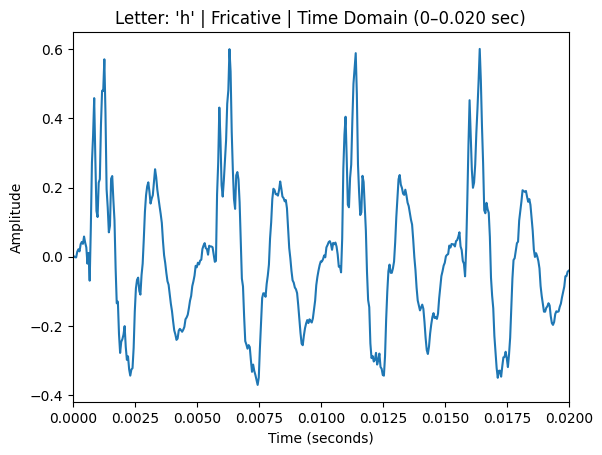

Letter: 'i'  →  Vowel


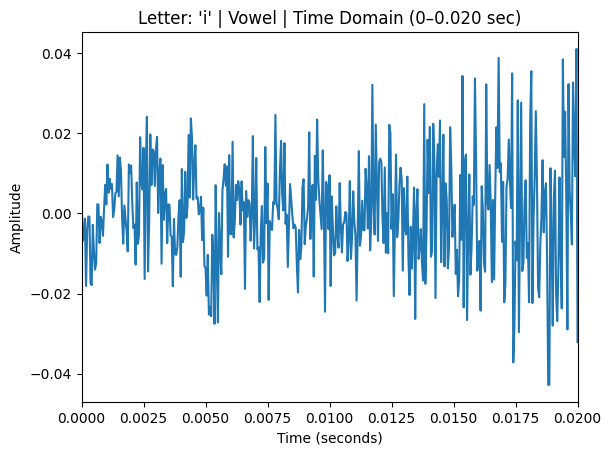

Letter: 's'  →  Fricative


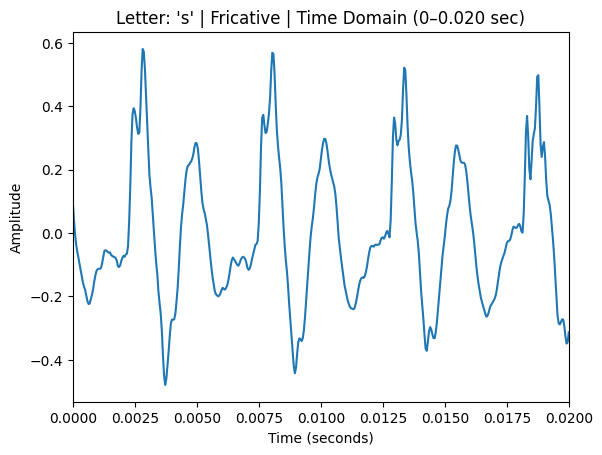

Letter: 'p'  →  Voiceless Plosive


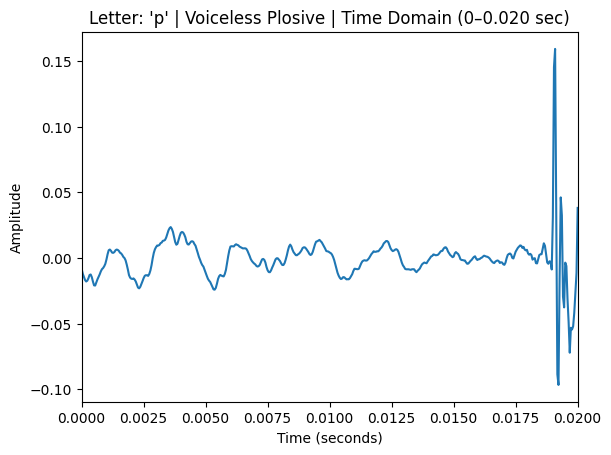

Letter: 'e'  →  Vowel


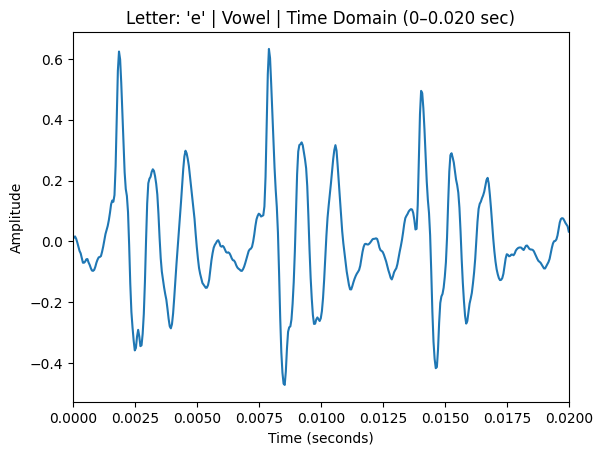

Letter: 'r'  →  Approximant (Semi-vowel)


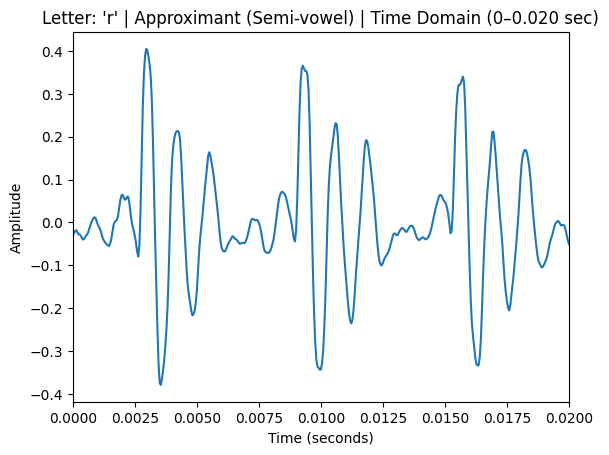

Letter: 'e'  →  Vowel


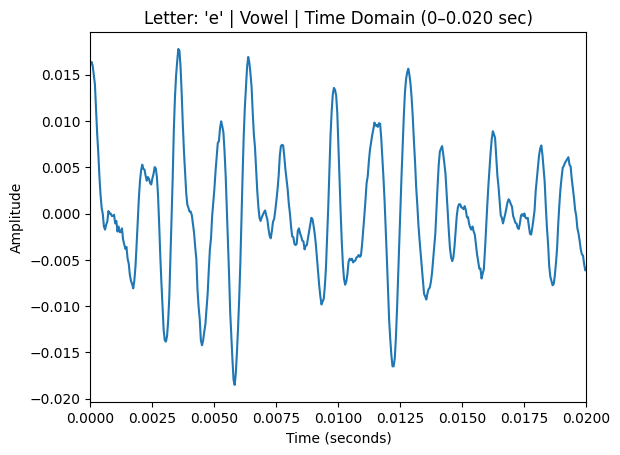

Letter: 'd'  →  Voiced Plosive


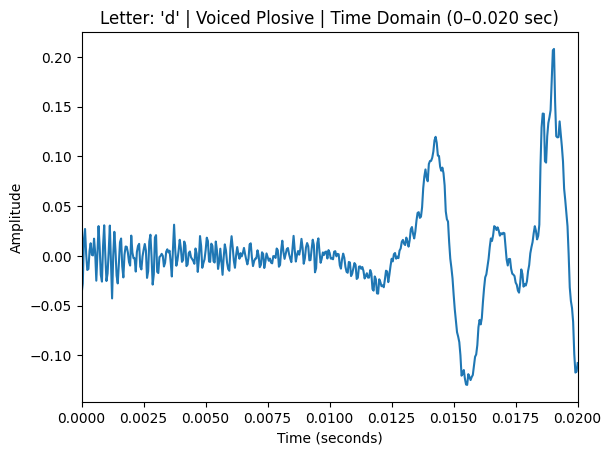

Letter: 'y'  →  Approximant (Semi-vowel)


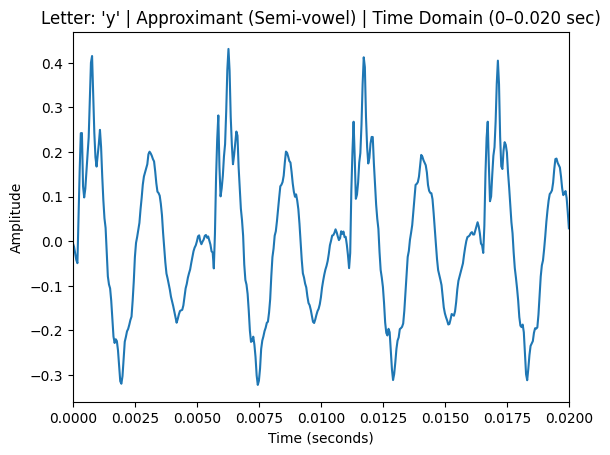

Letter: 'e'  →  Vowel


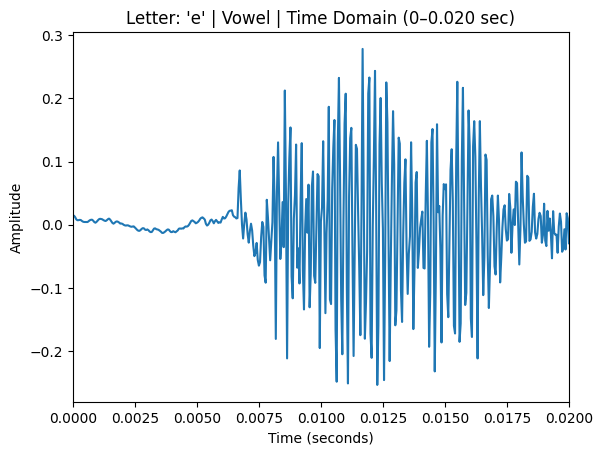

Letter: 's'  →  Fricative


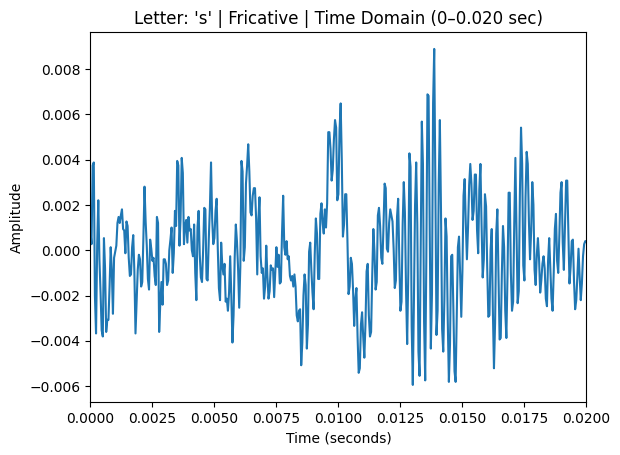


All letter plots and classifications generated successfully.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import wave


audio_path = "/content/LJ050-0274.wav"

with wave.open(audio_path, 'rb') as wf:
    sr = wf.getframerate()
    n_frames = wf.getnframes()
    audio_data = wf.readframes(n_frames)
    signal = np.frombuffer(audio_data, dtype=np.int16)

signal = signal.astype(np.float32)
signal = signal / np.max(np.abs(signal))

print("Sampling Rate:", sr)
print("Total Duration:", len(signal)/sr, "seconds")


sentence = "she judged the blue pen, put it on the table, and quietly whispered yes"


letters = [ch.lower() for ch in sentence if ch.isalpha()]

print("\nTotal Letters:", len(letters))


vowels = ['a', 'e', 'i', 'o', 'u']
plosives_voiceless = ['p', 't', 'k']
plosives_voiced = ['b', 'd', 'g']
fricatives = ['f', 'v', 's', 'z', 'h']
nasals = ['m', 'n']
approximants = ['w', 'y', 'r', 'l']
affricates = ['j']

def classify_letter(letter):
    if letter in vowels:
        return "Vowel"
    elif letter in plosives_voiceless:
        return "Voiceless Plosive"
    elif letter in plosives_voiced:
        return "Voiced Plosive"
    elif letter in fricatives:
        return "Fricative"
    elif letter in nasals:
        return "Nasal"
    elif letter in approximants:
        return "Approximant (Semi-vowel)"
    elif letter in affricates:
        return "Affricate"
    else:
        return "Other"

print("\nLetter Classification:\n")


total_duration = len(signal) / sr
segment_duration = total_duration / len(letters)

for i, letter in enumerate(letters):

    category = classify_letter(letter)
    print(f"Letter: '{letter}'  →  {category}")

    start_time = i * segment_duration
    end_time = (i + 1) * segment_duration

    start_sample = int(start_time * sr)
    end_sample = int(end_time * sr)

    segment = signal[start_sample:end_sample]

    if len(segment) == 0:
        continue


    max_samples = int(0.020 * sr)
    segment = segment[:max_samples]

    time_axis = np.linspace(0, len(segment)/sr, len(segment))


    plt.figure()
    plt.plot(time_axis, segment)
    plt.xlim(0, 0.020)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.title(f"Letter: '{letter}' | {category} | Time Domain (0–0.020 sec)")
    plt.show()

print("\nAll letter plots and classifications generated successfully.")


Sampling Rate: 16000
Duration: 4.5001875 seconds


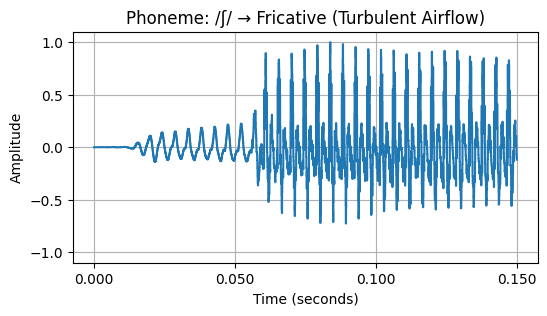

Extracted /ʃ/ → Fricative (Turbulent Airflow)


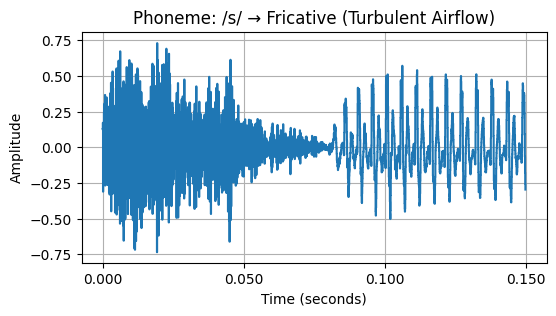

Extracted /s/ → Fricative (Turbulent Airflow)


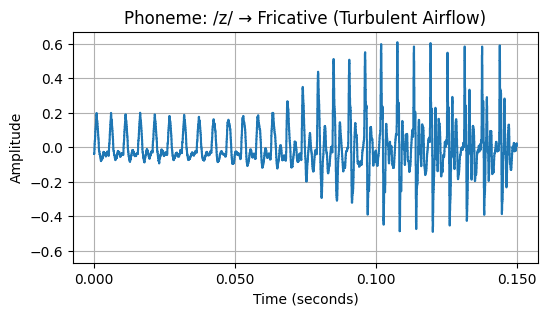

Extracted /z/ → Fricative (Turbulent Airflow)


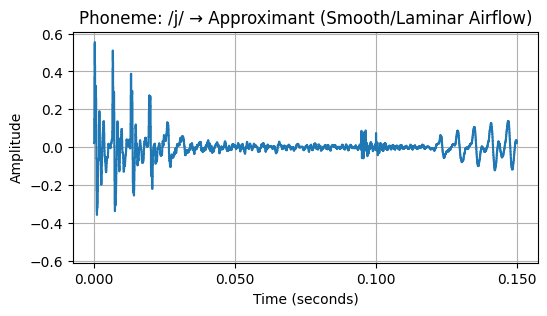

Extracted /j/ → Approximant (Smooth/Laminar Airflow)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display


audio_path = "/content/LJ050-0274.wav"
signal, sr = librosa.load(audio_path, sr=16000, mono=True)

print("Sampling Rate:", sr)
print("Duration:", len(signal)/sr, "seconds")


signal = signal / np.max(np.abs(signal))


phoneme_segments = {
    "ʃ": [0.00, 0.15],
    "i1": [0.15, 0.35],
    "s": [0.35, 0.50],
    "i2": [0.50, 0.70],
    "z": [0.70, 0.85],
    "j": [0.85, 1.00],
    "u": [1.00, 1.25]
}



fricatives = ["ʃ", "s", "z"]
approximants = ["j"]


for phoneme, (start, end) in phoneme_segments.items():

    start_sample = int(start * sr)
    end_sample = int(end * sr)
    segment = signal[start_sample:end_sample]

    if phoneme in fricatives:
        category = "Fricative (Turbulent Airflow)"
    elif phoneme in approximants:
        category = "Approximant (Smooth/Laminar Airflow)"
    else:
        continue

    plt.figure(figsize=(6,3))
    librosa.display.waveshow(segment, sr=sr)
    plt.title(f"Phoneme: /{phoneme}/ → {category}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

    print(f"Extracted /{phoneme}/ → {category}")
